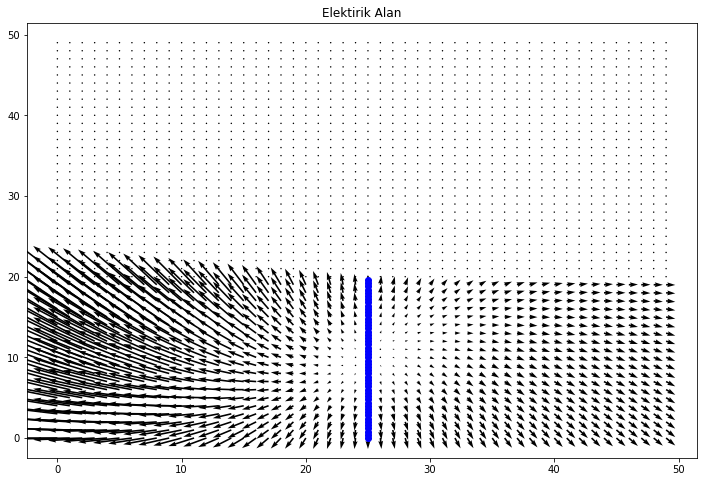

In [7]:
import matplotlib.pyplot as plt
import numpy as np
uzunluk = 20 #length
dilim_sayısı = 50 #number slices for rod sclicing
dy = uzunluk/dilim_sayısı #
dilimler = [] # a depo for the location of slices
l = 0
while l < dilim_sayısı:
    a = 0 + l*dy # y locations of slices their x location is fixed and 20
    dilimler.append(a)
    l = l + 1
#axis ayarı/ limits of the axis
N = 50
M = 50
#koordinatlar / coordinates and the grid
X = np.arange(0, M, 1)
Y = np.arange(0, N, 1)
X, Y = np.meshgrid(X, Y)

Ex ,Ey = np.zeros((N,M)), np.zeros((N,M)) #Elektrik alanımın x ve y si için depo / a depo for my electric fields x and y component

konum_x = 25*np.ones(50) #x location is fixed and 20
konum_y = dilimler
konum = [[konum_x],[konum_y]]

yuk = 11*10**(-9) # charge is something like + 11 coulomb

payda_data = [] #depo for denominator values

# I want to combine every electric field formed by every single slice together

for i in range(N):
    for j in range(M):
        payda = ((i - 20)**2 + (j - konum_y[j])**2)**1.5  #payda = denominator, denom of E. field equation is ((x-x_0)^2 + (y - y_0)^2)* \sqrt((x-x_0)^2 + (y - y_0)^2)
        payda_data.append(payda)
        if np.all(payda_data) != 0:
             Ex[i, j] += yuk*(8.99*10**9)*(j - konum_x[j]) / payda_data[j]
             Ey[i, j] += yuk*(8.99*10**9)*(i - konum_y[j]) / payda_data[j]



fig, ax = plt.subplots(figsize = (12,8))
plt.plot(*konum,'bo')
q = ax.quiver(X, Y, Ex, Ey)
#plt.figure(figsize = (12, 8))
#plt.plot(*konum, 'bo')
#plt.streamplot(X, Y, Ex, Ey)
plt.title('Elektirik Alan')
#plt.axis('equal')
plt.show()